In [1]:
import numpy as np
import xarray as xr
import pandas as pd
import geopandas as gpd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from shapely.ops import unary_union
import functions_to_load_datasets as load_datasets

%matplotlib inline

ERROR 1: PROJ: proj_create_from_database: Open of /home/atmo/bin/anaconda3/envs/lartelt_dev/share/proj failed


## Get boundaries for arid & wet region (works)

ERROR 1: PROJ: proj_create_from_database: Open of /home/atmo/bin/anaconda3/envs/lartelt_dev/share/proj failed


start loading ERA5 data...
<class 'geopandas.geodataframe.GeoDataFrame'>
  aridity                                           geometry  latitude  \
0    arid  MULTIPOLYGON (((-71.00000 -47.00000, -71.00000...     -53.5   
1   humid  MULTIPOLYGON (((-69.00000 -54.00000, -68.00000...     -55.5   

   longitude  N_months_with_low_precip  Month_of_first_low_precip  \
0      -68.5                         6                          1   
1      -67.5                         0                          1   

   Month_of_last_low_precip  \
0                        12   
1                        12   

                                            geomPoly            geomPoint  \
0  POLYGON ((-69.00000 -54.00000, -69.00000 -53.0...  POINT (-68.5 -53.5)   
1  POLYGON ((-68.00000 -56.00000, -68.00000 -55.0...  POINT (-67.5 -55.5)   

   Long   Lat  transcom_regions  
0 -68.5 -53.5               4.0  
1 -67.5 -55.5               4.0  


/home/atmo/bin/anaconda3/envs/lartelt_dev/lib/python3.10/site-packages/geopandas/geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


<AxesSubplot: >

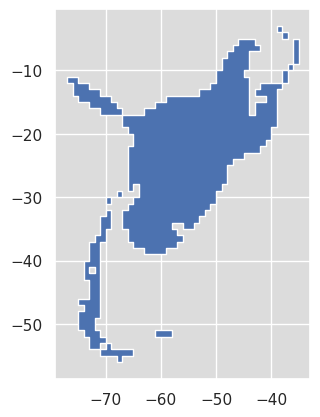

In [1]:
import numpy as np
import xarray as xr
import pandas as pd
import geopandas as gpd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from shapely.ops import unary_union
import functions_to_load_datasets as load_datasets
%matplotlib inline

grid = pd.read_pickle('/home/eschoema/masks/CTTranscomMask1x1Grid.pkl')
grid_SAT = grid[grid.transcom_regions==4]
#print(grid_SAT.head())
CT_Mask = pd.read_pickle('/home/eschoema/masks/CTTranscomMask1x1Borders.pkl')

threshold = 0.0015
min_dry_months = 6

df = load_datasets.load_ERA5_precip_gdf(region='SAT_SATr', unit='YearlyMEANLowPrecipitation', threshold=threshold)
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.longitude, df.latitude), crs="EPSG:4326")
#print(gdf.head())
igdf = gdf.within(CT_Mask[(CT_Mask.transcom == 'SAT')].geometry.iloc[0])
gdf_SAT = gdf.loc[igdf]

gdf_SAT['aridity'] = np.zeros(len(gdf_SAT), str)
gdf_SAT['aridity'] = np.where(gdf_SAT['N_months_with_low_precip'].values>=min_dry_months, 'arid', 'humid')
df_new = gdf_SAT.merge(grid_SAT, on=['longitude', 'latitude'], how='outer')
gdf_new = gpd.GeoDataFrame(df_new, geometry=df_new['geometry_y'], crs="EPSG:4326")
gdf_new.drop(columns=['geometry_x', 'geometry_y'], inplace=True)
print(type(gdf_new))

polygon = gdf_new.dissolve(by='aridity').reset_index()
print(polygon.head())
polygon[polygon['aridity']=='humid'].plot()


## other stuff that does not work or only generates polygons around the gridpoints, not the whole area

In [2]:
threshold = 0.0005

df = load_datasets.load_ERA5_precip_gdf(region='SAT_SATr', unit='YearlyMEANLowPrecipitation', threshold=threshold)
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.longitude, df.latitude), crs="EPSG:4326")
print(gdf.head())

start loading ERA5 data...
   latitude  longitude  N_months_with_low_precip  Month_of_first_low_precip  \
0    -55.75     -67.75                         0                          1   
1    -55.75     -67.50                         0                          1   
2    -55.75     -67.25                         0                          1   
3    -55.50     -67.75                         0                          1   
4    -55.50     -67.50                         0                          1   

   Month_of_last_low_precip                     geometry  
0                        12  POINT (-67.75000 -55.75000)  
1                        12  POINT (-67.50000 -55.75000)  
2                        12  POINT (-67.25000 -55.75000)  
3                        12  POINT (-67.75000 -55.50000)  
4                        12  POINT (-67.50000 -55.50000)  


In [3]:
min_dry_months = 6
filtered_gdf = gdf[gdf['N_months_with_low_precip'] >= min_dry_months]
print(max(filtered_gdf.N_months_with_low_precip.values))


12


In [4]:
# Convert the geometry column to a single polygon
dissolved_geometry = unary_union(filtered_gdf['geometry'])
print(dissolved_geometry)

MULTIPOINT (-80.75 -5.75, -80.75 -5.5, -80.75 -5.25, -80.75 -5, -80.75 -4.75, -80.75 -4.5, -80.75 -4, -80.75 -3.75, -80.75 -3.5, -80.75 -3.25, -80.75 -3, -80.75 -1.25, -80.75 -1, -80.5 -5.75, -80.5 -5.5, -80.5 -5.25, -80.5 -5, -80.5 -4.75, -80.5 -4.5, -80.5 -4.25, -80.5 -3.75, -80.5 -3.5, -80.5 -3.25, -80.25 -5.75, -80.25 -5.5, -80 -5.75, -80 -5.5, -79.75 -6.75, -79.5 -6.75, -78.75 -8.75, -78.75 -8.5, -78.75 -8.25, -78.5 -8.75, -77.75 -10.5, -77.5 -10.75, -75.75 -14.75, -75.75 -14.5, -75.75 -14.25, -75.75 -14, -75.75 -13.75, -75.75 -13.5, -75.5 -14.75, -75.5 -14.5, -75.5 -14.25, -75.5 -14, -75.25 -14.75, -75.25 -14.5, -75.25 -14.25, -75 -14.75, -75 -14.5, -74.75 -14.75, -73.75 -15.75, -73.75 -15.5, -73.5 -15.75, -73.25 -15.75, -73 -15.75, -71.75 -16.75, -71.75 -16.5, -71.75 -16.25, -71.5 -16.75, -71.5 -16.5, -71.25 -16.75, -71 -16.75, -70.75 -31, -70.75 -30.25, -70.75 -30, -70.75 -29.5, -70.75 -29.25, -70.75 -29, -70.75 -28.75, -70.75 -28.5, -70.75 -28.25, -70.75 -28, -70.75 -27.75, -7

In [5]:
dissolved_gdf = gpd.GeoDataFrame(geometry=[dissolved_geometry])
dissolved_gdf.crs = gdf.crs  # Set the CRS of "dissolved_gdf" to the CRS of "gdf"

<AxesSubplot: >

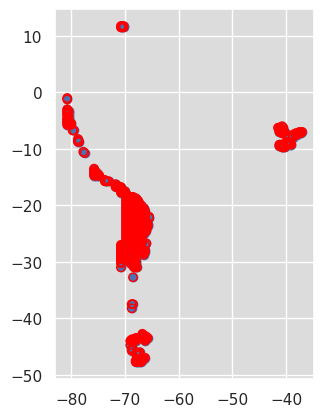

In [6]:
ax = dissolved_gdf.plot()
filtered_gdf.plot(ax=ax, facecolor='none', edgecolor='red')

## for not continious data

In [2]:
import numpy as np
import xarray as xr
import pandas as pd
import geopandas as gpd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from shapely.ops import unary_union
from skimage import measure
import functions_to_load_datasets as load_datasets

%matplotlib inline

In [ ]:

threshold = 0.0005

df = load_datasets.load_ERA5_precip_gdf(region='SAT_SATr', unit='YearlyMEANLowPrecipitation', threshold=threshold)
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.longitude, df.latitude), crs="EPSG:4326")

min_dry_months = 6

# generate polygons around the regions where the number of dry months is above the threshold
filtered_gdf = gdf[gdf['N_months_with_low_precip'] >= min_dry_months]
# regrid the data to a raster with latitude, longitude coordinates



# find contours of the raster
contours = measure.find_contours(raster, 6)





In [2]:
threshold = 0.0005

df = load_datasets.load_ERA5_precip_gdf(region='SAT_SATr', unit='YearlyMEANLowPrecipitation', threshold=threshold)
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.longitude, df.latitude), crs="EPSG:4326")
print(gdf.head())

start loading ERA5 data...
   latitude  longitude  N_months_with_low_precip  Month_of_first_low_precip  \
0    -55.75     -67.75                         0                          1   
1    -55.75     -67.50                         0                          1   
2    -55.75     -67.25                         0                          1   
3    -55.50     -67.75                         0                          1   
4    -55.50     -67.50                         0                          1   

   Month_of_last_low_precip                     geometry  
0                        12  POINT (-67.75000 -55.75000)  
1                        12  POINT (-67.50000 -55.75000)  
2                        12  POINT (-67.25000 -55.75000)  
3                        12  POINT (-67.75000 -55.50000)  
4                        12  POINT (-67.50000 -55.50000)  


In [4]:
min_dry_months = 6
#filtered_gdf = gdf[gdf['N_months_with_low_precip'] >= min_dry_months]
#print(max(filtered_gdf.N_months_with_low_precip.values))

raster = gdf['N_months_with_low_precip'].values.reshape(len(gdf['latitude'].values), len(gdf['longitude'].values))
print(raster)

# Find contours around the regions with the specified value
contours = measure.find_contours(np.where(raster >= min_dry_months, 1, 0), 0.5)

ValueError: cannot reshape array of size 24625 into shape (24625,24625)

## new approach

In [1]:
import geopandas as gpd
from shapely.geometry import Polygon
from skimage import measure
import numpy as np
import functions_to_load_datasets as load_datasets
import matplotlib.pyplot as plt
%matplotlib inline

# Load your GeoDataFrame (replace 'your_data.shp' with your file)
threshold = 0.0005

df = load_datasets.load_ERA5_precip_gdf(region='SAT_SATr', unit='YearlyMEANLowPrecipitation', threshold=threshold)
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.longitude, df.latitude), crs="EPSG:4326")

# Assuming your GeoDataFrame has "latitude", "longitude", and "values" columns
value_to_extract = 6

# Find contours around the regions with the specified value
contours = measure.find_contours(gdf.N_months_with_low_precip.values, 6)

fig, ax = plt.subplots()
for contour in contours:
    ax.plot(contour[:, 1], contour[:, 0], linewidth=2)
plt.show()



ERROR 1: PROJ: proj_create_from_database: Open of /home/atmo/bin/anaconda3/envs/lartelt_dev/share/proj failed


start loading ERA5 data...


IndexError: tuple index out of range

In [ ]:
import geopandas as gpd
from shapely.geometry import Polygon
from skimage import measure
import numpy as np
import functions_to_load_datasets as load_datasets
import matplotlib.pyplot as plt
%matplotlib inline

# Load your GeoDataFrame (replace 'your_data.shp' with your file)
threshold = 0.0005

df = load_datasets.load_ERA5_precip_gdf(region='SAT_SATr', unit='YearlyMEANLowPrecipitation', threshold=threshold)
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.longitude, df.latitude), crs="EPSG:4326")

# Assuming your GeoDataFrame has "latitude", "longitude", and "values" columns
value_to_extract = 6

# Determine grid resolution (adjust as needed)
grid_resolution = 0.25

# Create a regular grid of latitudes and longitudes
min_lat = gdf['latitude'].min()
max_lat = gdf['latitude'].max()
min_lon = gdf['longitude'].min()
max_lon = gdf['longitude'].max()

latitudes = np.arange(min_lat, max_lat + grid_resolution, grid_resolution)
longitudes = np.arange(min_lon, max_lon + grid_resolution, grid_resolution)

# Create a meshgrid from latitudes and longitudes
lon_grid, lat_grid = np.meshgrid(longitudes, latitudes)

# Create an empty grid with NaN values
raster = np.full_like(lat_grid, np.nan)

# Fill the grid with values from the GeoDataFrame
for row in gdf.iterrows():
    #lat_idx = int((row[1]['latitude'] - min_lat) / grid_resolution)
    lat_idx = int((row[1]['latitude'] - min_lat) / grid_resolution)
    #lon_idx = int((row[1]['longitude'] - min_lon) / grid_resolution)
    lon_idx = int((row[1]['longitude'] - min_lon) / grid_resolution)
    raster[lat_idx, lon_idx] = row[1]['N_months_with_low_precip']

# Find contours around the regions with the specified value
contours = measure.find_contours(np.where(np.isnan(raster), 0, raster == value_to_extract))

fig, ax = plt.subplots()
for contour in contours:
    ax.plot(contour[:, 1], contour[:, 0], linewidth=2)
plt.show()


'''# Convert contours to GeoDataFrame
boundary_geoms = [Polygon(contour[:, ::-1]) for contour in contours]  # Invert y-axis to match GeoDataFrame orientation
boundary_gdf = gpd.GeoDataFrame(geometry=boundary_geoms, crs=gdf.crs)

# Filter out empty or invalid geometries
boundary_gdf = boundary_gdf[~boundary_gdf.is_empty]

# Plot the generated boundaries
fig, ax = plt.subplots(figsize=(10, 10))  # Adjust the figure size as needed
boundary_gdf.plot(ax=ax)

# Show the plot
plt.show()
'''